In [6]:
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [27]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_data = pd.DataFrame(boston.data)
boston_data.columns=boston.feature_names

boston_data['PRICE']=boston.target # Dependent Variable, value to be predicted

In [29]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA

In [37]:
# Checing null values
boston_data.isnull().sum()

# No null values found, looks clean data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [38]:
boston_data.dtypes

# All continuous variables, no categorical

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

### Univariate Analysis


In [88]:
boston_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


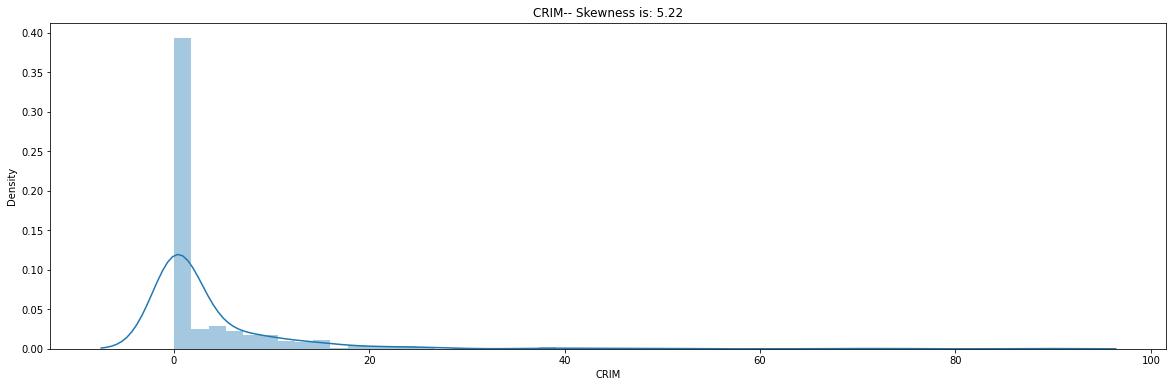

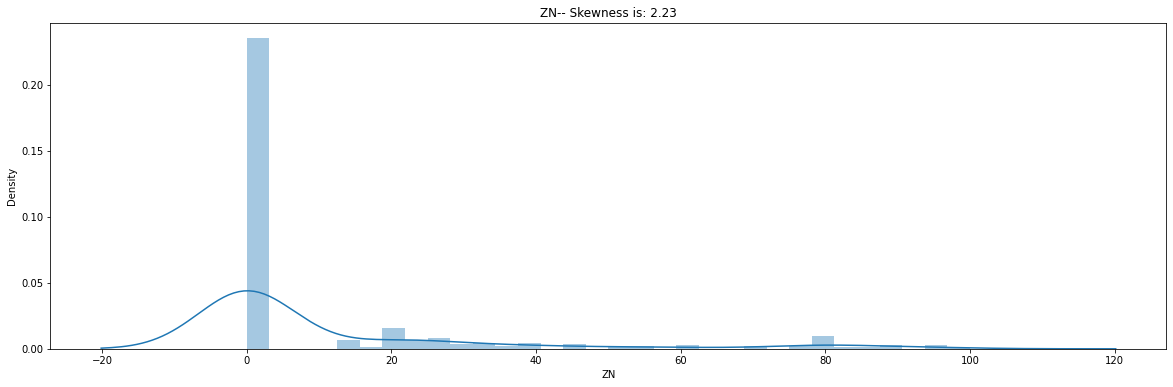

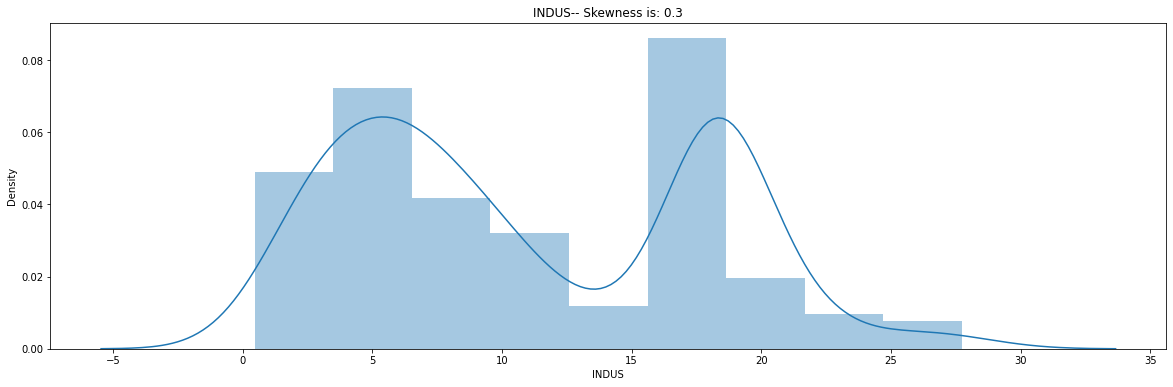

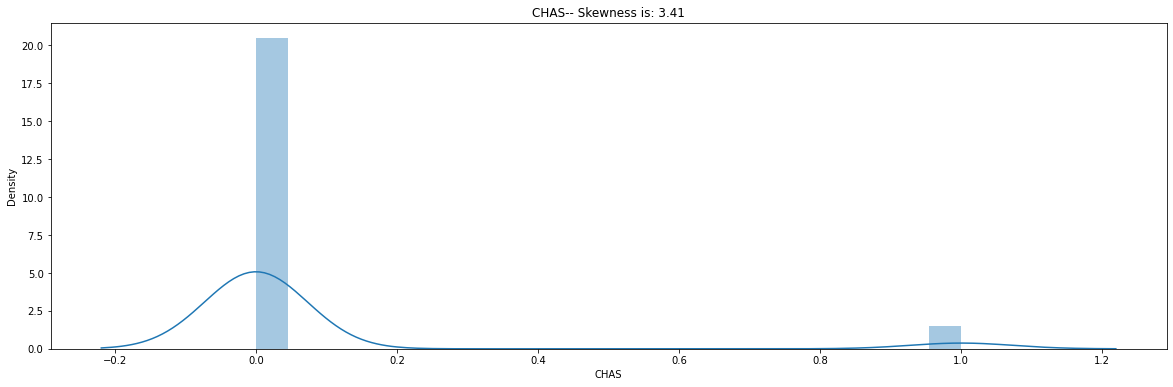

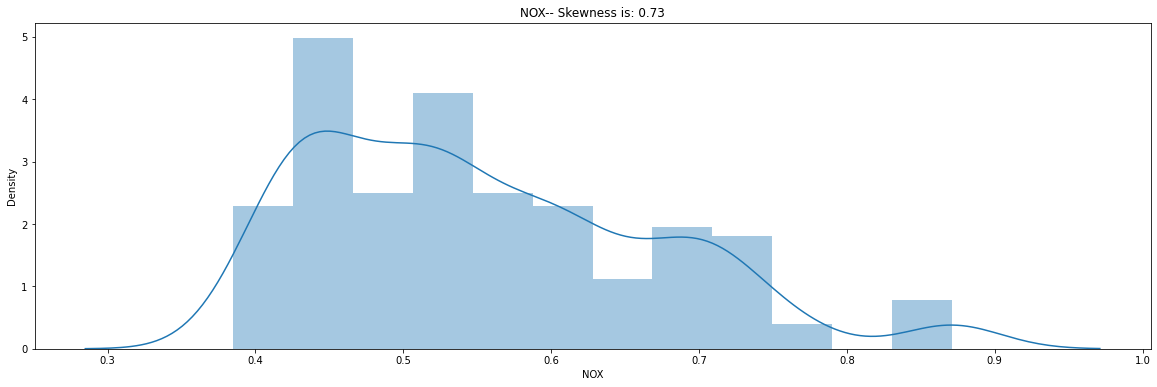

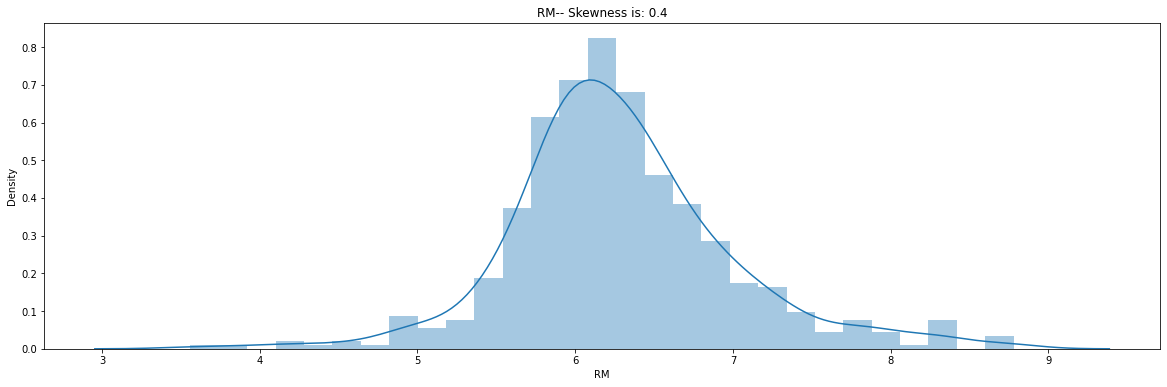

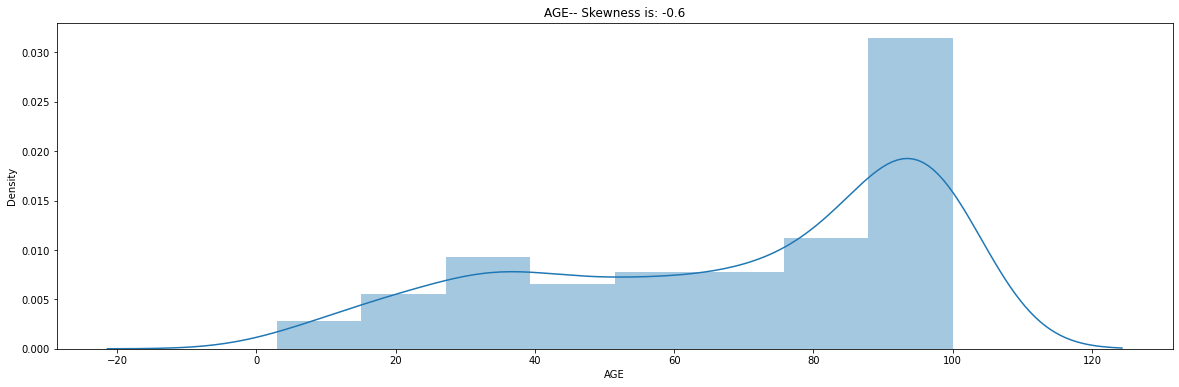

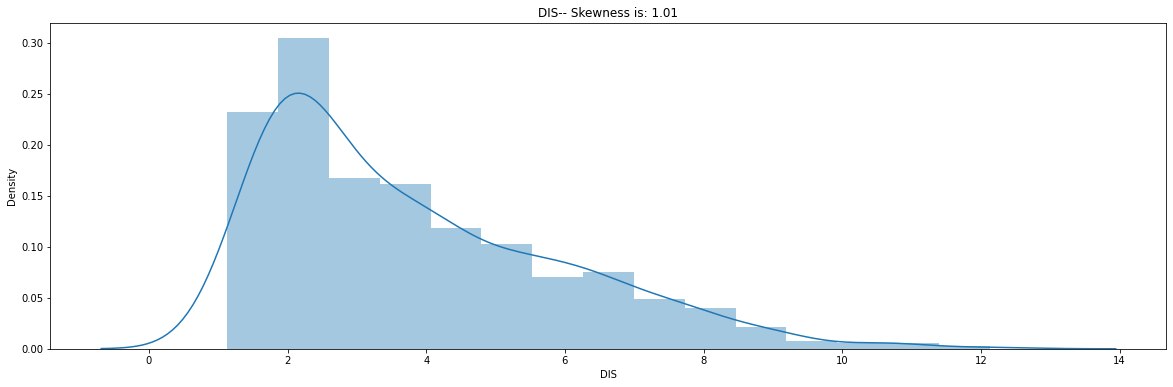

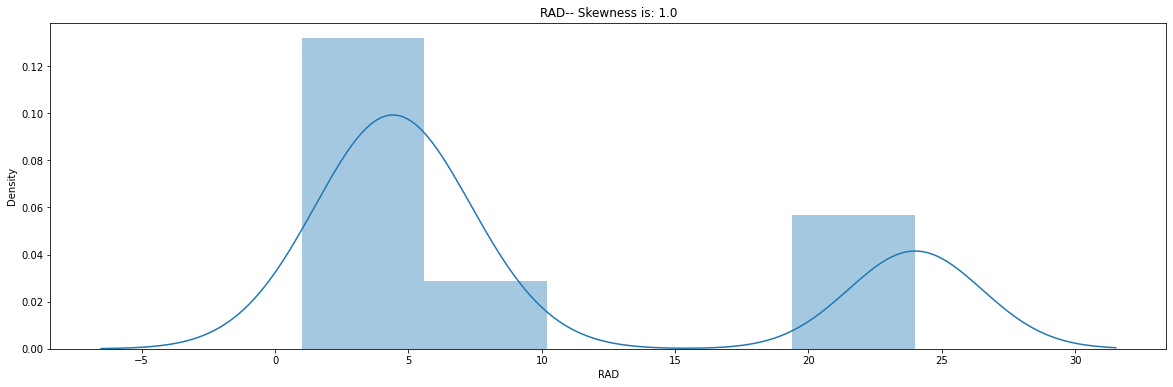

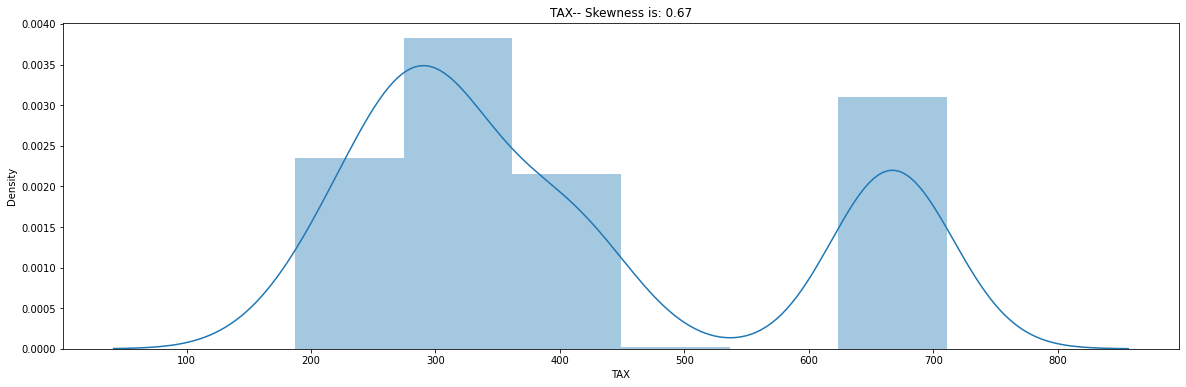

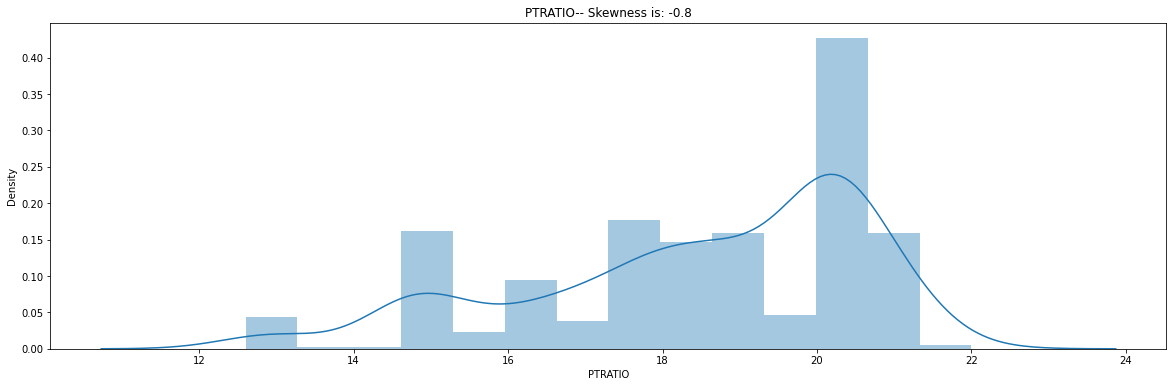

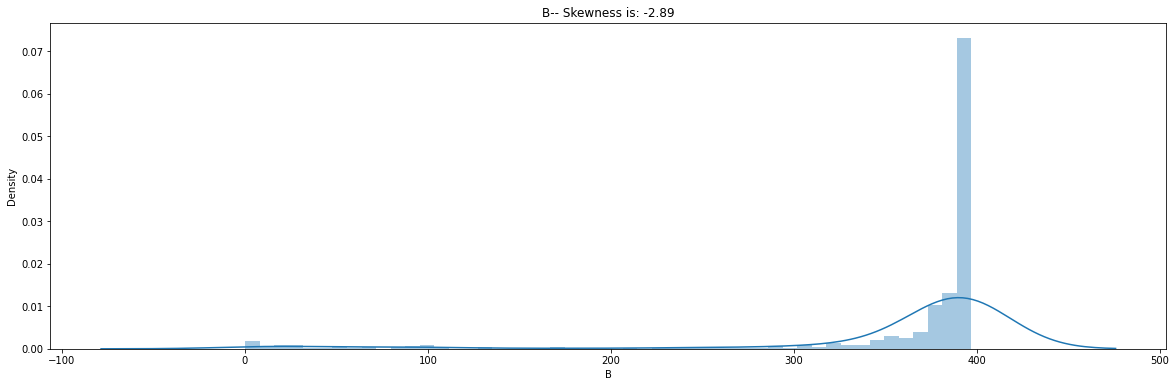

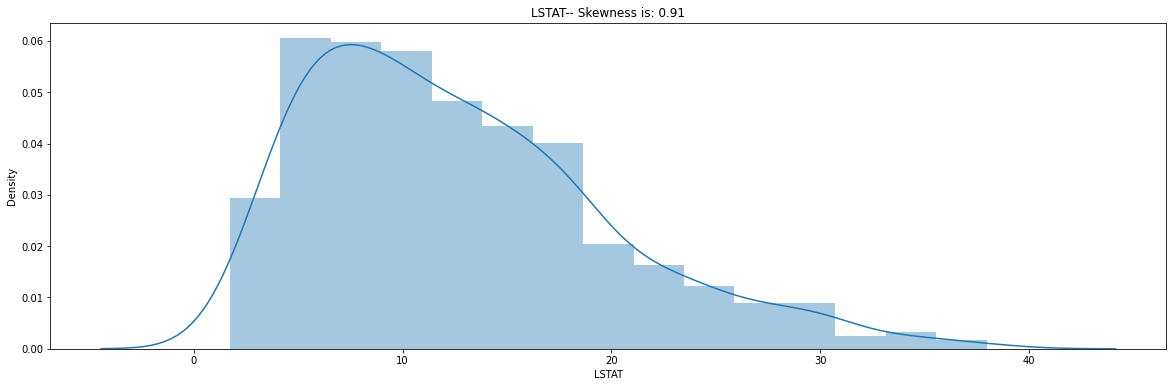

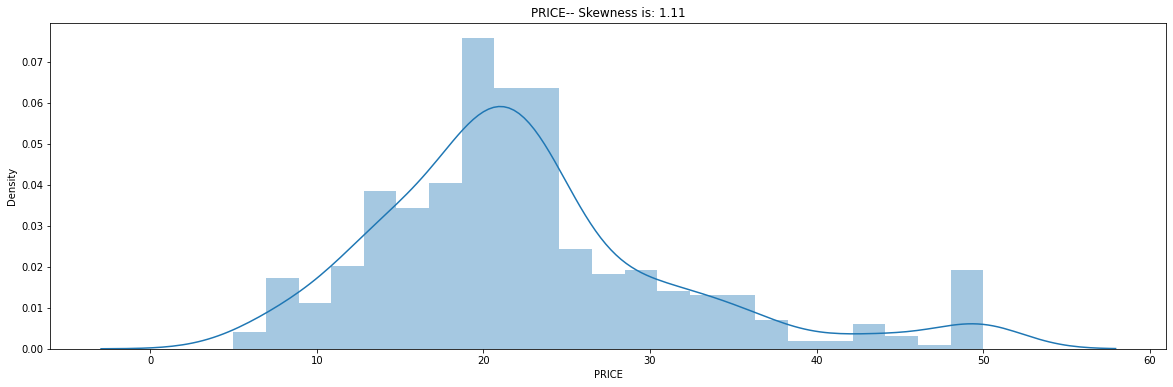

In [84]:
# Checking distribution of data

for x in boston_data.columns:
    plt.figure(figsize=(20,6))
    skew=boston_data[x].skew()
    plt.title(str(x)+'-- Skewness is: '+str(round(skew,2)))
    sns.distplot(boston_data[x])

# Skewness between -0.5 to +0.5 is good, above that we need to transform, 
# negative skewness means left tailed, right skewness means right tailed

# Skewness formula= 3(mean-median)/standard deviations

Outliers in CRIM are:  13.043478260869565
Outliers in ZN are:  13.438735177865613
Outliers in INDUS are:  0.0
Outliers in CHAS are:  6.91699604743083
Outliers in NOX are:  0.0
Outliers in RM are:  5.928853754940712
Outliers in AGE are:  0.0
Outliers in DIS are:  0.9881422924901185
Outliers in RAD are:  0.0
Outliers in TAX are:  0.0
Outliers in PTRATIO are:  2.964426877470356
Outliers in B are:  15.217391304347826
Outliers in LSTAT are:  1.383399209486166
Outliers in PRICE are:  7.905138339920948


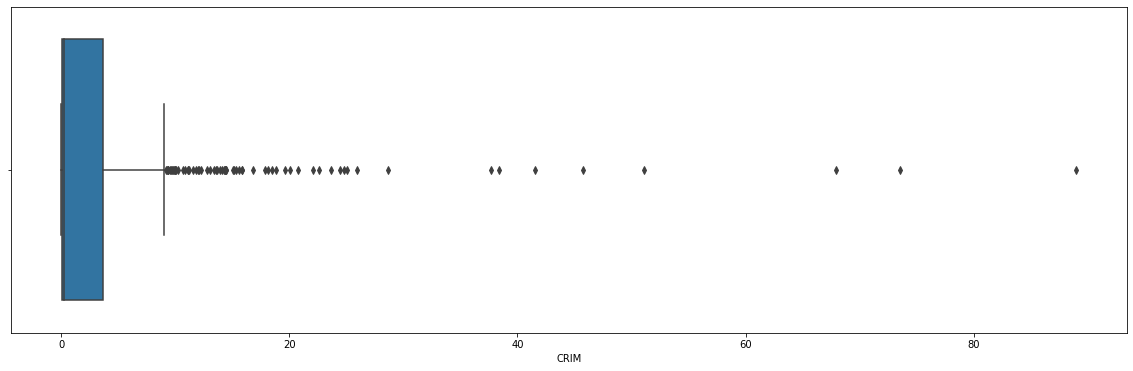

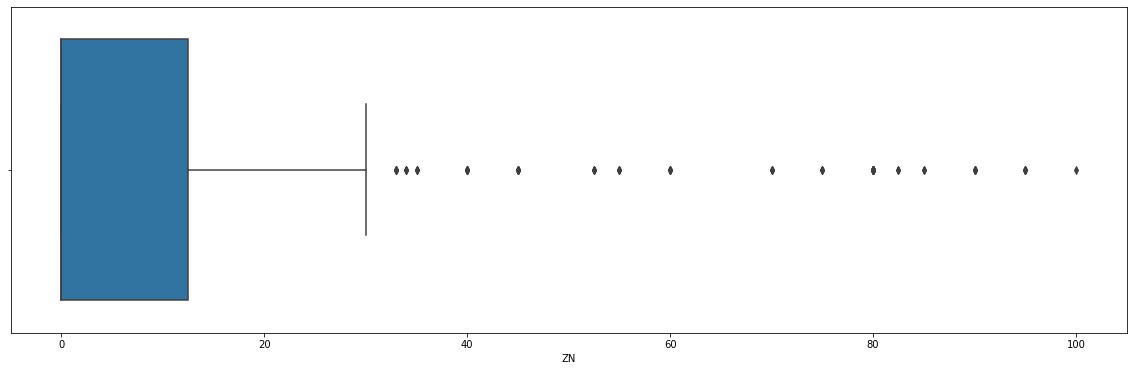

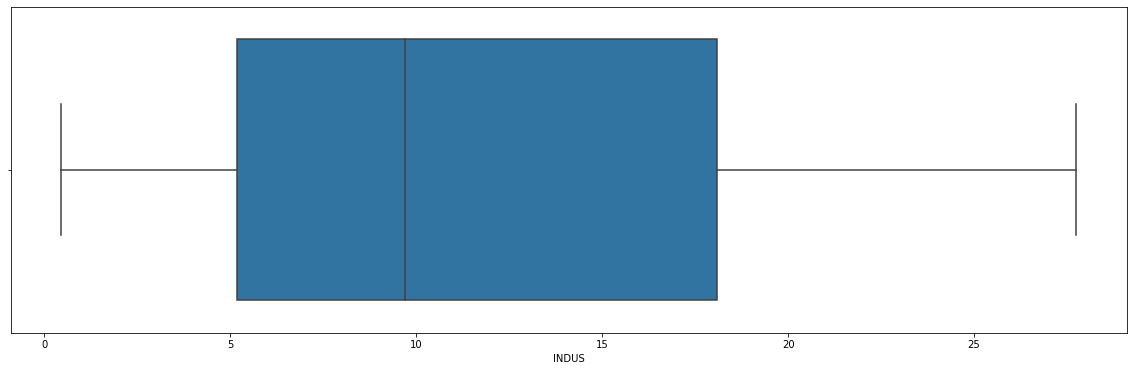

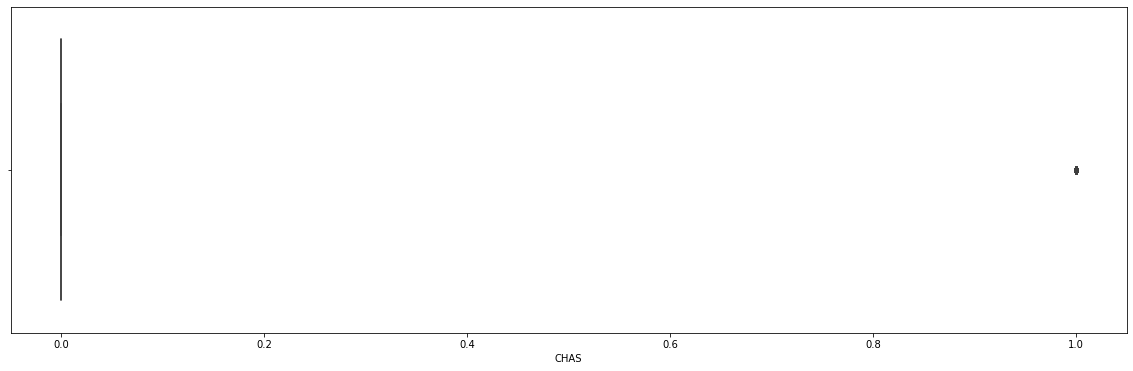

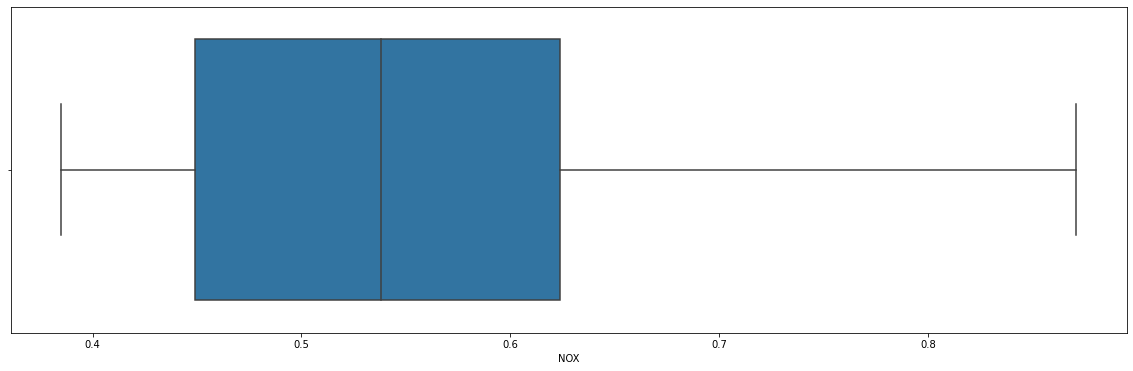

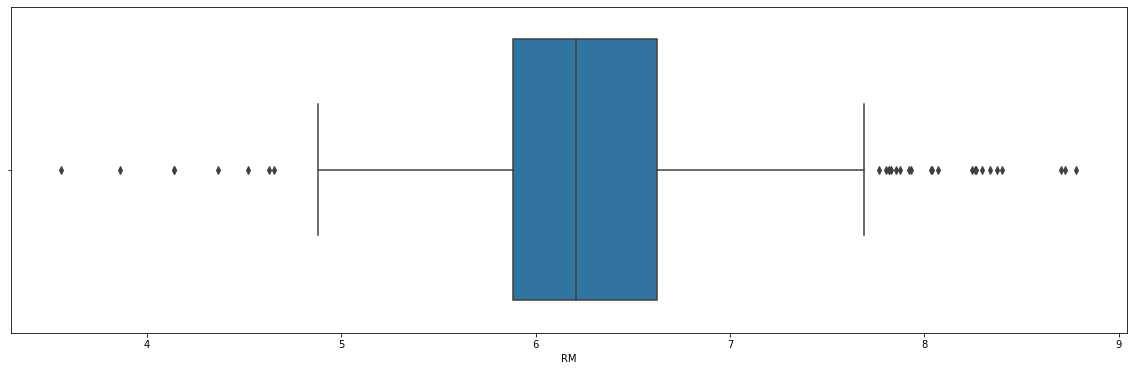

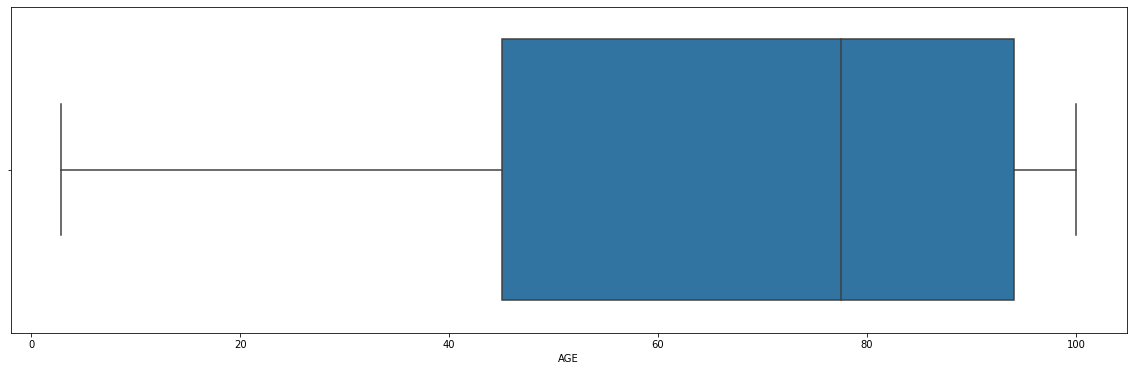

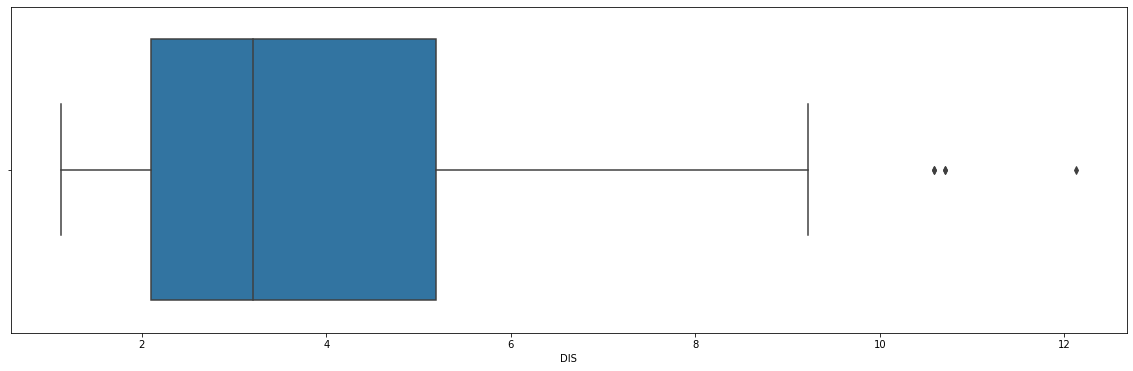

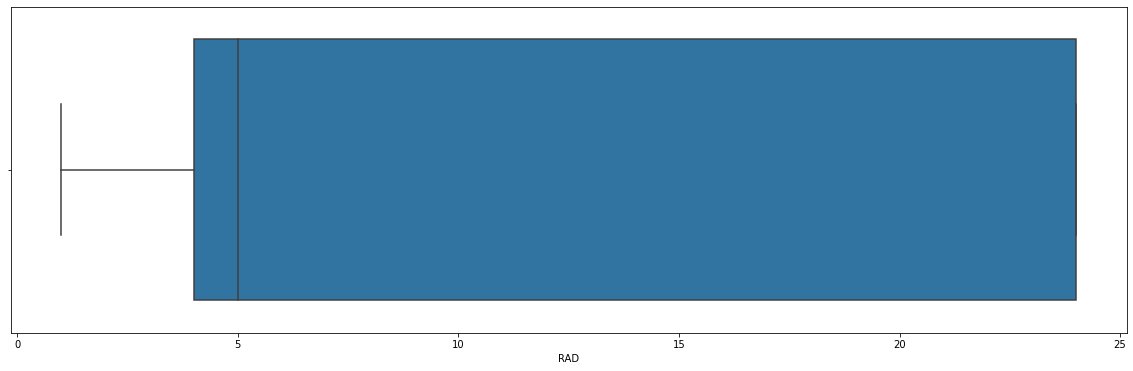

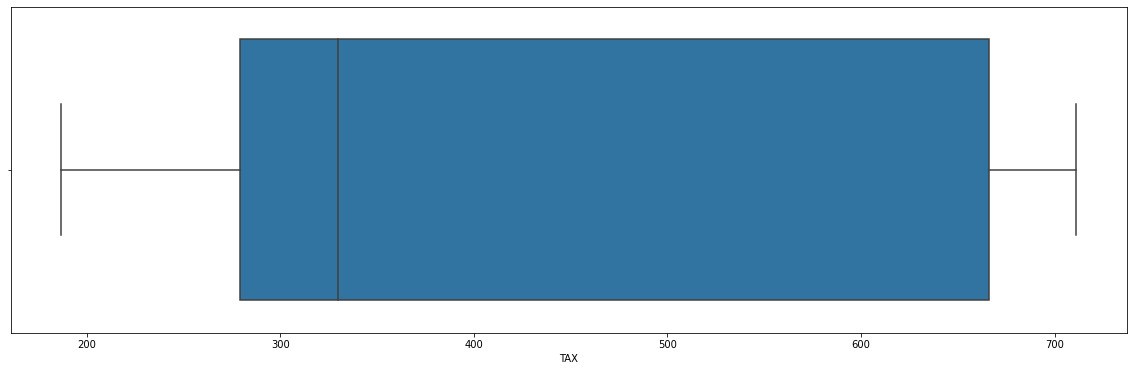

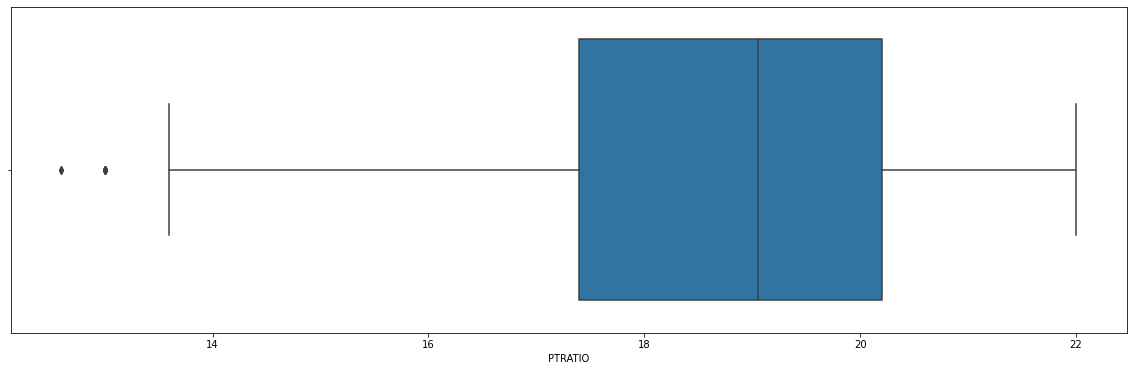

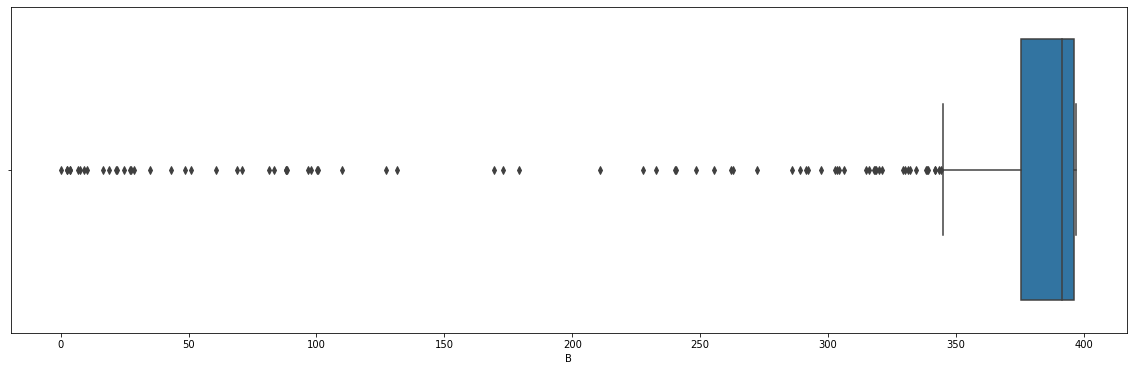

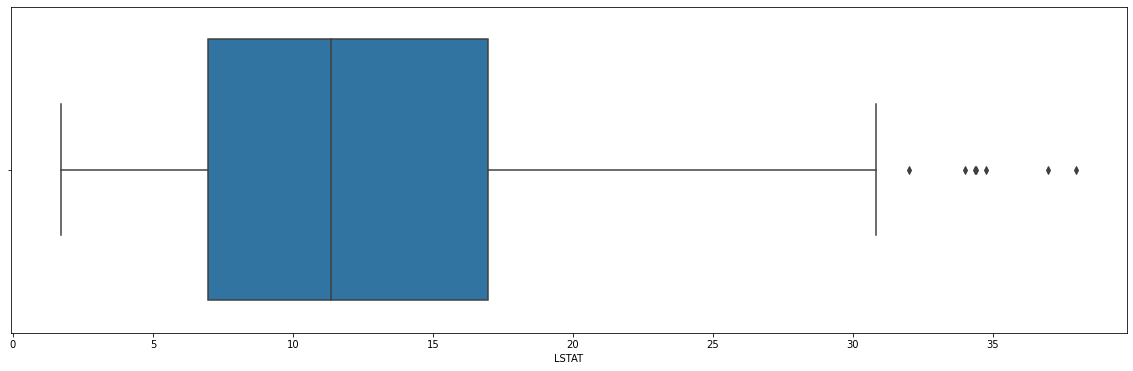

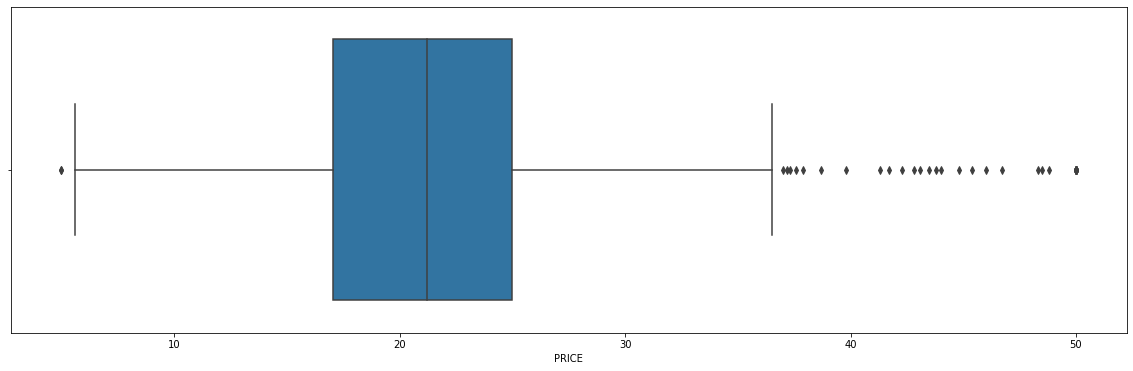

In [85]:
# Checking outliers, and handling them, need to handle them as ML models don't work well with them

for x in boston_data.columns:
    plt.figure(figsize=(20,6))
    q1=boston_data[x].quantile(0.25)
    q3=boston_data[x].quantile(0.75)
    IQR=q3-q1
    outliers=boston_data[(boston_data[x]<(q1-1.5*IQR))|(boston_data[x]>(q3+1.5*IQR))][x].count()
    total_values=boston_data[x].count()
    print('Outliers in {} are: '.format(x),outliers*100.0/total_values)
    sns.boxplot(boston_data[x])
    
# https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

### Bi-Variate analysis

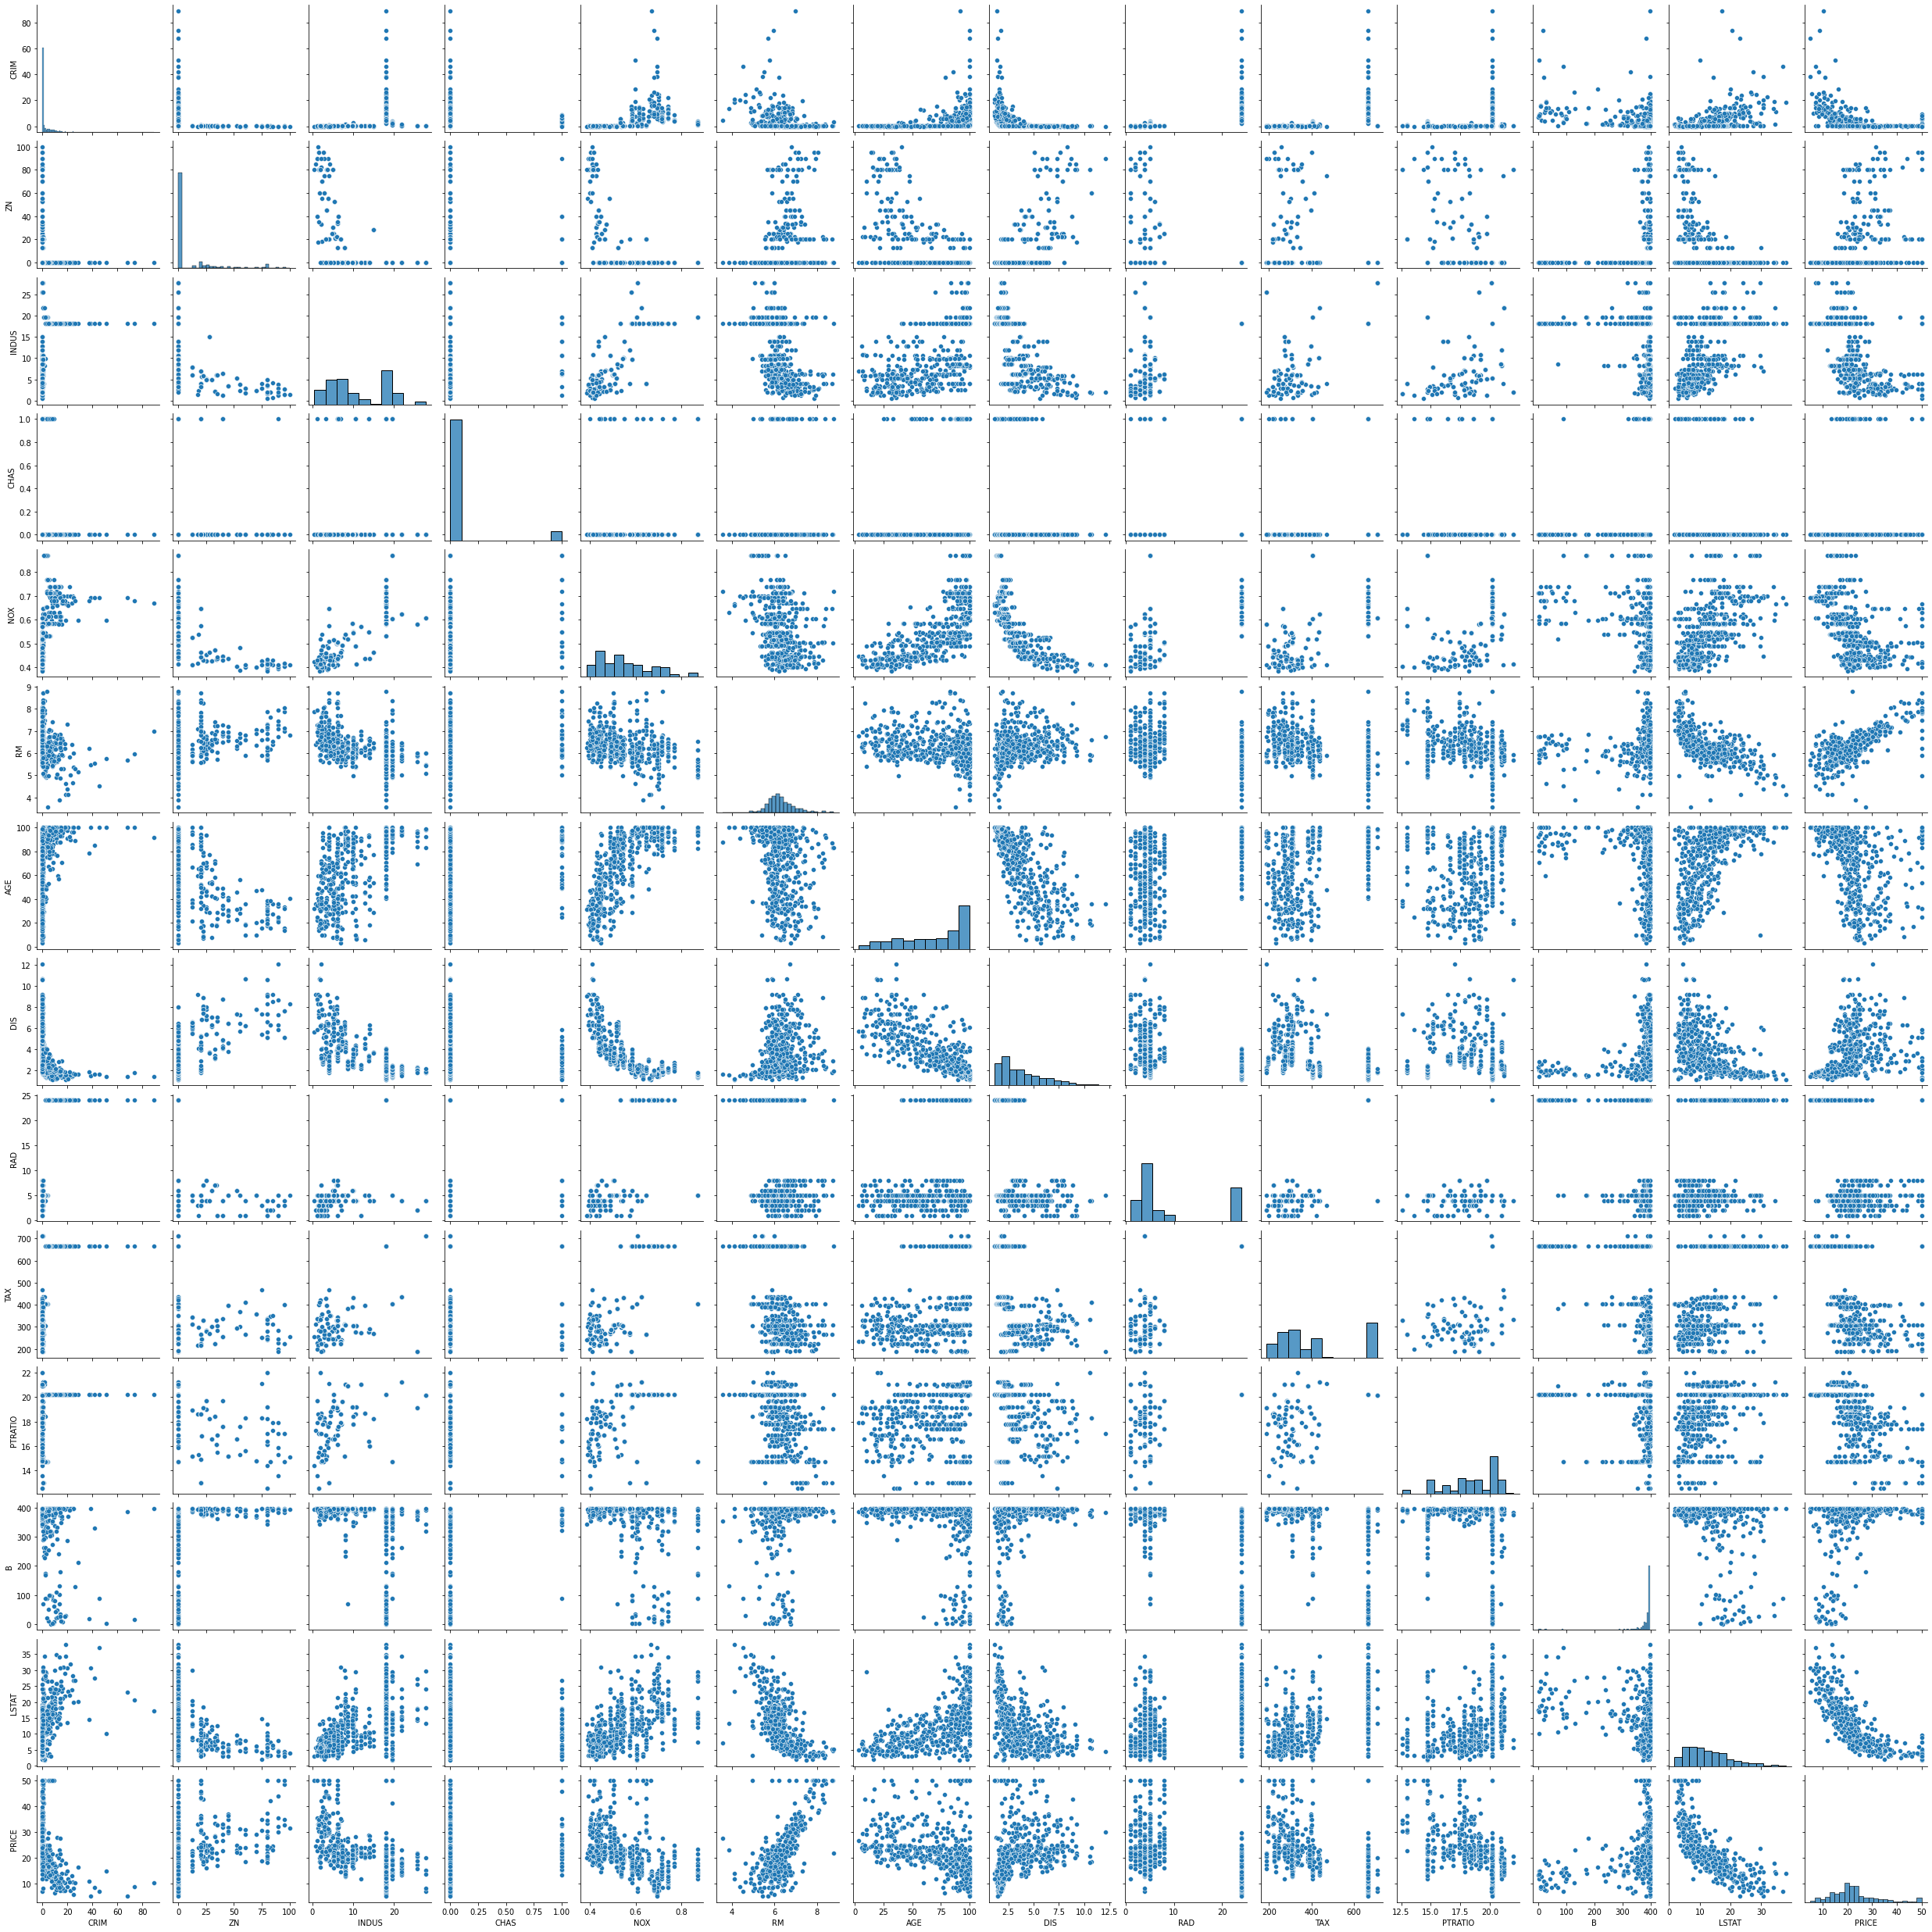

In [89]:
sns.pairplot(data=boston_data)

In [90]:
# We can see a features which have direct correlation with each other as well as with our target/dependent variable

<AxesSubplot: >

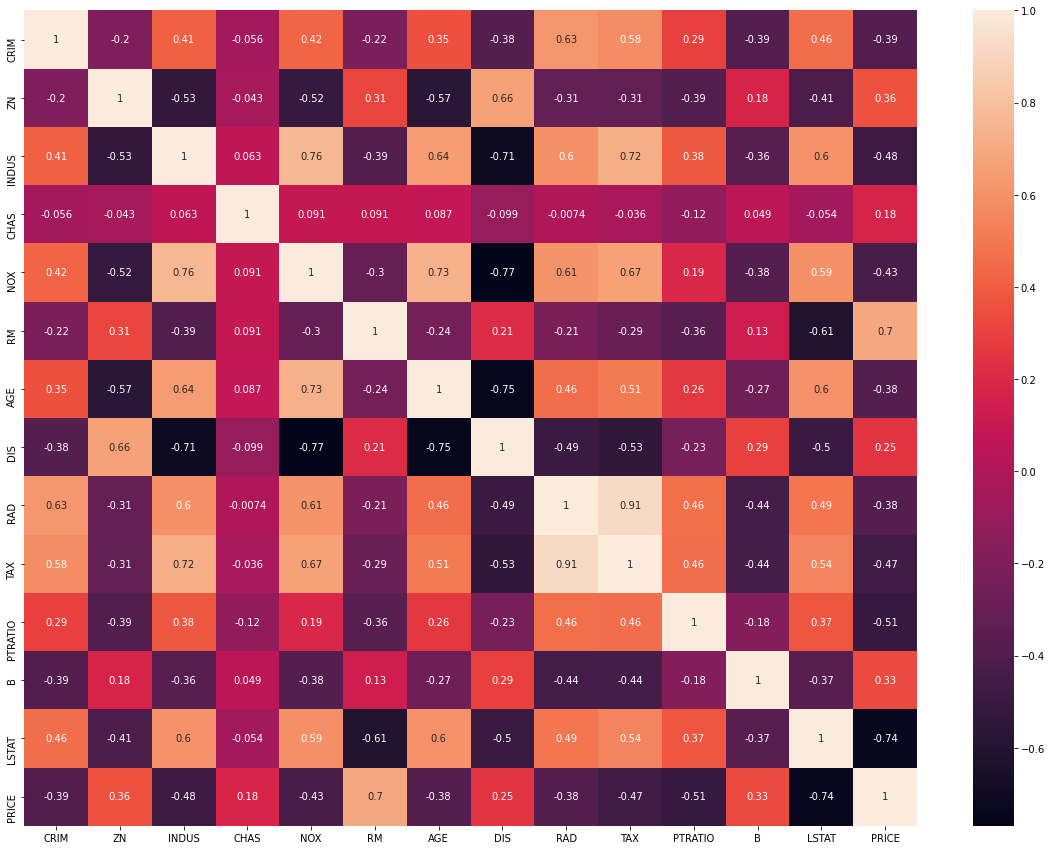

In [100]:
plt.figure(figsize=(20,15))
sns.heatmap(boston_data.corr(),annot=True)

## Implementing Models

In [133]:
# Before Fiting model, normalise the data using log transformation
# Using log1p, as it can handle 0 values

from sklearn.model_selection import train_test_split

x_main=boston_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y_main=boston_data[['PRICE']]

x_main=np.log1p(x_main)
x_train,x_test,y_train,y_test=train_test_split(x_main,y_main)

#### Linear Regression

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
lr=LinearRegression()
score=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=kf,scoring='r2')
cv_score_lr=score.mean()
print('CV Scores for LR: ',score)
print('Coeff of variation Scores for LR: ',score.std()/score.mean())
print('CV Score for LR is: ',cv_score_lr)

CV Scores for LR:  [0.72075255 0.74603895 0.8206836  0.73405086 0.81030939]
Coeff of variation Scores for LR:  0.05354518982236258
CV Score for LR is:  0.7663670688141657


In [156]:
lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)

print('Mean_Absolute_Error: ',mean_absolute_error(y_test,lr_predict))
print('Mean_Squared_Error: ',mean_squared_error(y_test,lr_predict))
print('R2_Score: ',r2_score(y_test,lr_predict))

Mean_Absolute_Error:  2.70465397972858
Mean_Squared_Error:  14.741274888623922
R2_Score:  0.786237072758636


In [157]:
# The model is decently good, as variance is low. Training and test models have similar R2 score performances. 
# Not overfiting
# Also Bias is okayish, as error is not so high

#### Ridge Regression

In [231]:
# https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

In [179]:
from sklearn.linear_model import RidgeCV,Ridge

kf=KFold(n_splits=5)
ridge_cv=RidgeCV(alphas=(0.01,0.03,0.05,0.1,0.2,0.3,0.5,0.7,0.9),cv=kf,scoring='r2').fit(x_train,y_train)


In [199]:
# Best mean score for 5 CVs
ridge_cv.best_score_

0.7664930053915752

In [200]:
ridge_cv.alpha_

0.03

In [201]:
ridge_predict=ridge_cv.predict(x_test)
print('R2_Score: ',r2_score(y_test,ridge_predict))

R2_Score:  0.7879321396476464


#### Lasso Regression

In [227]:
from sklearn.linear_model import Lasso,LassoCV

lasso_cv=LassoCV(alphas=(0.0001,0.0005,0.0007,0.001,0.005,0.01,0.03,0.05,0.1,0.3,0.5,0.7,0.9),cv=kf) # By-default r2 scoring used in lasso
lasso_cv.fit(x_train,y_train)


LassoCV(alphas=(0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1,
                0.3, 0.5, 0.7, 0.9),
        cv=KFold(n_splits=5, random_state=None, shuffle=False))

In [226]:
lasso_cv.alpha_

0.0007

In [230]:
lasso=Lasso(alpha=lasso_cv.alpha_).fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)

print('R2_Score: ',r2_score(y_test,lasso_pred))

R2_Score:  0.787131809762194


#### Support Vector Machines

In [240]:
from sklearn.svm import SVR

kernel=['linear', 'poly', 'rbf', 'sigmoid']
kf=KFold(n_splits=5)
for x in kernel:
    svr=SVR(kernel=x)
    score=cross_val_score(estimator=svr,X=x_train,y=y_train,scoring='r2',cv=kf)
    print('Score for Kernel {} is :'.format(x),score)
    print('Mean Score for Kernel {} is :'.format(x),score.mean())
    print('STD for Kernel {} is :'.format(x),score.std())
    print('Coefficient of Variation for Kernel {} is :'.format(x),score.std()/score.mean())
    print('\n')


Score for Kernel linear is : [0.67058708 0.64748762 0.75413554 0.69299931 0.75272944]
Mean Score for Kernel linear is : 0.7035877985849142
STD for Kernel linear is : 0.04317028846293904
Coefficient of Variation for Kernel linear is : 0.06135735802946693


Score for Kernel poly is : [0.60155651 0.58735088 0.68111501 0.64678582 0.67835037]
Mean Score for Kernel poly is : 0.6390317190094871
STD for Kernel poly is : 0.03860669885943055
Coefficient of Variation for Kernel poly is : 0.06041437022761838


Score for Kernel rbf is : [0.25843308 0.27115146 0.39809598 0.31914493 0.36634377]
Mean Score for Kernel rbf is : 0.3226338444331579
STD for Kernel rbf is : 0.05364594745060276
Coefficient of Variation for Kernel rbf is : 0.16627501539664707


Score for Kernel sigmoid is : [ 0.00561979 -0.01396392  0.02482261  0.02707772  0.0225798 ]
Mean Score for Kernel sigmoid is : 0.013227200978816555
STD for Kernel sigmoid is : 0.015562717598319344
Coefficient of Variation for Kernel sigmoid is : 1.1765

In [242]:
# Coeficient of variation(CV) to calculate if SD is high or low?
# Measures the spread of values relative to mean, if CV within 1 then good

In [243]:
# We can see that coeff. of variation is less for linear and poly kernel, with high mean scores

In [247]:
svr=SVR(kernel='linear').fit(x_train,y_train)
svr_predict=svr.predict(x_test)

print('R2 score: ',r2_score(y_test,svr_predict))

R2 score:  0.7456263031172852


####  Stochastic Gradient Descent


In [251]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(x_train,y_train)
sgd_predict=sgd.predict(x_test)

print('R2 score: ',r2_score(y_test,sgd_predict))

R2 score:  0.733676355597572


### Using Tree Based Models

#### Decision Tree

In [284]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

kf=KFold(n_splits=5)
decision_tree=DecisionTreeRegressor()
parameters={'criterion' : ("mse", "friedman_mse", "mae", "poisson"),'splitter' : ("best", "random")}
grid_dt=GridSearchCV(estimator=decision_tree,param_grid=parameters,scoring='r2',cv=kf).fit(x_train,y_train)


In [290]:
grid_dt.best_score_

0.7244976952663662

In [291]:
grid_dt.best_params_

{'criterion': 'mse', 'splitter': 'random'}

In [293]:
dt_predict=grid_dt.best_estimator_.predict(x_test)

print ('RMSE: ',mean_squared_error(y_test,dt_predict,squared=False))
print ('MSE: ',mean_squared_error(y_test,dt_predict))
print('R2 score: ',r2_score(y_test,dt_predict))

RMSE:  4.101910444090482
MSE:  16.825669291338574
R2 score:  0.7560113119329119


In [305]:
pd.DataFrame(grid_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008449,0.005124,0.003116,0.000576,mse,best,"{'criterion': 'mse', 'splitter': 'best'}",0.400531,0.718675,0.833907,0.579853,0.845196,0.675632,0.167636,5
1,0.003951,0.000717,0.002549,0.000368,mse,random,"{'criterion': 'mse', 'splitter': 'random'}",0.637468,0.678957,0.872735,0.748975,0.684354,0.724498,0.082260,1
2,0.004937,0.001217,0.002526,0.000628,friedman_mse,best,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.505038,0.630186,0.855092,0.585898,0.839951,0.683233,0.140098,4
3,0.002935,0.000080,0.002049,0.000079,friedman_mse,random,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.677394,0.764144,0.799828,0.553639,0.763132,0.711627,0.088682,2
4,0.014721,0.002008,0.002097,0.000142,mae,best,"{'criterion': 'mae', 'splitter': 'best'}",0.702353,0.723152,0.786554,0.482074,0.821681,0.703163,0.118559,3
5,0.007363,0.000529,0.001912,0.000015,mae,random,"{'criterion': 'mae', 'splitter': 'random'}",0.630571,0.817852,0.729624,0.366090,0.782244,0.665276,0.162369,6
6,0.009983,0.001071,0.002002,0.000156,poisson,best,"{'criterion': 'poisson', 'splitter': 'best'}",0.387922,0.738186,0.547311,0.611151,0.850023,0.626919,0.158658,7
7,0.003166,0.000083,0.001894,0.000010,poisson,random,"{'criterion': 'poisson', 'splitter': 'random'}",0.339387,0.554139,0.703038,0.511024,0.810920,0.583702,0.162305,8


#### Random Forest

In [314]:
from sklearn.ensemble import RandomForestRegressor

rand_forest=RandomForestRegressor(n_estimators=300)
rand_forest.fit(x_train,y_train)
rf_predict=rand_forest.predict(x_test)

print('R2 score: ',r2_score(y_test,rf_predict))

R2 score:  0.8950530361047171


#### Gradient Boosting

In [308]:
from sklearn.ensemble import GradientBoostingRegressor

kf=KFold(n_splits=5)
param={'learning_rate':(.1,.2,.3,.5,.75,1),'n_estimators':(100,200,300)}
grad_boost=GradientBoostingRegressor()

grid_grad_boost=GridSearchCV(estimator=grad_boost,param_grid=param,scoring='r2',cv=kf).fit(x_train,y_train)

In [310]:
grid_grad_boost.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [312]:
grid_grad_boost.best_score_

0.8762331567371039

In [313]:
grad_boost_predict=grid_grad_boost.best_estimator_.predict(x_test)

print('R2 score: ',r2_score(y_test,grad_boost_predict))

R2 score:  0.9298584100460683


#### Xtreme Gradient Boosting

In [411]:
import xgboost as xgb

xgb_reg=xgb.XGBRegressor(n_estimators=100,learning_rate=.2)
xgb_reg.fit(x_train,y_train)
xgb_predict=xgb_reg.predict(x_test)

print('R2 score: ',r2_score(y_test,xgb_predict))

R2 score:  0.9065515351875286


In [412]:
# Overall Scores for regression_models

models=['LR','Ridge','Lasso','SVR','SGD','Decision Tree','Random Forest','Gradient Boosting','XGB']
score=[]
model_pred={'LR':lr_predict,'Ridge':ridge_predict,'Lasso':lasso_pred,'SVR':svr_predict,
            'SGD':sgd_predict,'Decision Tree':dt_predict,'Random Forest':rf_predict,
            'Gradient Boosting':grad_boost_predict,'XGB':xgb_predict}
for x,y in model_pred.items():
    print('R2 score for model {}: '.format(str(x)),r2_score(y_test,y))
    score.append(r2_score(y_test,y))
    
score_predicted=pd.DataFrame(zip(models,score),columns=['Model','R2_Score'])



R2 score for model LR:  0.786237072758636
R2 score for model Ridge:  0.7879321396476464
R2 score for model Lasso:  0.787131809762194
R2 score for model SVR:  0.7456263031172852
R2 score for model SGD:  0.733676355597572
R2 score for model Decision Tree:  0.7560113119329119
R2 score for model Random Forest:  0.8950530361047171
R2 score for model Gradient Boosting:  0.9298584100460683
R2 score for model XGB:  0.9065515351875286


<AxesSubplot: xlabel='Model', ylabel='R2_Score'>

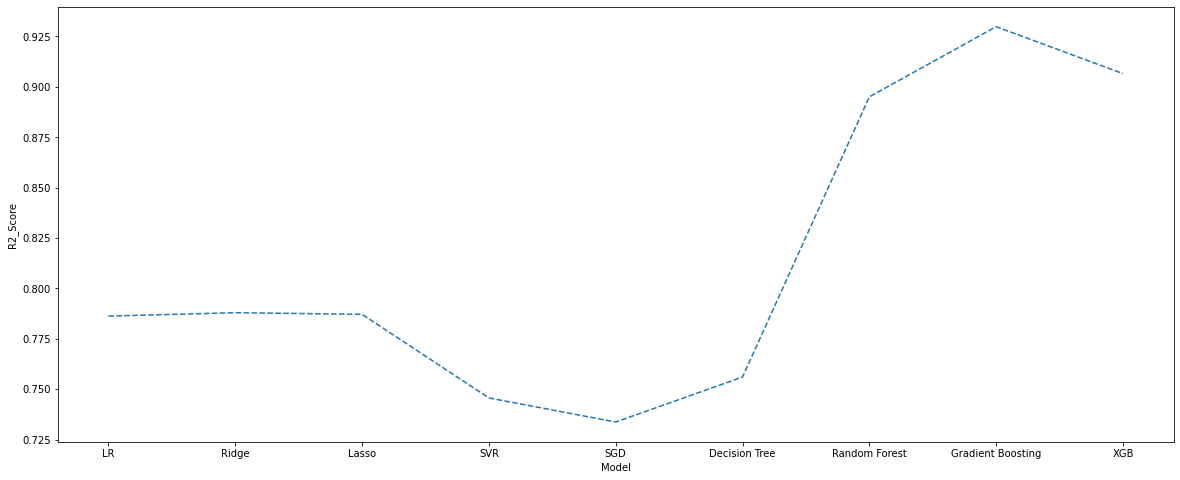

In [413]:
plt.figure(figsize=(20,8))
sns.lineplot(data=score_predicted,x='Model',y='R2_Score', linestyle='dashed')

### Using Principal Components Analysis

In [414]:
# We could see some columns that have some good correlation, thus using PCA to reduce them

In [415]:
x_train.shape

(379, 13)

In [439]:
from sklearn.decomposition import PCA

for x in range(2,14):    
    pca=PCA(n_components=x)
    pca_x_train=pca.fit_transform(x_train)
    pca_x_test=pca.transform(x_test)
    print('Variance Ratio for {} components: '.format(x),pca.explained_variance_ratio_.sum())


Variance Ratio for 2 components:  0.8145631922539253
Variance Ratio for 3 components:  0.8800944497460061
Variance Ratio for 4 components:  0.9204771100945005
Variance Ratio for 5 components:  0.9474674104700125
Variance Ratio for 6 components:  0.9686521568522555
Variance Ratio for 7 components:  0.9837071507870057
Variance Ratio for 8 components:  0.9896167956795009
Variance Ratio for 9 components:  0.9944674227947882
Variance Ratio for 10 components:  0.9978669018758508
Variance Ratio for 11 components:  0.9991592110747309
Variance Ratio for 12 components:  0.9998454601185416
Variance Ratio for 13 components:  1.0


In [447]:
# Taking 8 components

pca=PCA(n_components=8)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)

In [448]:
lr.fit(pca_x_train,y_train)
lr_pca_predict=lr.predict(pca_x_test)

ridge_cv.fit(pca_x_train,y_train)
ridge_cv_pca_predict=ridge_cv.predict(pca_x_test)

lasso_cv.fit(pca_x_train,y_train)
lasso_cv_pca_predict=lasso_cv.predict(pca_x_test)

svr.fit(pca_x_train,y_train)
svr_pca_predict=svr.predict(pca_x_test)

sgd.fit(pca_x_train,y_train)
sgd_pca_predict=sgd.predict(pca_x_test)

grid_dt.best_estimator_.fit(pca_x_train,y_train)
dt_pca_predict=grid_dt.best_estimator_.predict(pca_x_test)

rand_forest.fit(pca_x_train,y_train)
rf_pca_predict=rand_forest.predict(pca_x_test)

grid_grad_boost.best_estimator_.fit(pca_x_train,y_train)
grad_boost_pca_predict=grid_grad_boost.best_estimator_.predict(pca_x_test)

xgb_reg.fit(pca_x_train,y_train)
xgb_pca_predict=xgb_reg.predict(pca_x_test)


In [449]:
# Overall Scores for regression_models

models=['LR','Ridge','Lasso','SVR','SGD','Decision Tree','Random Forest','Gradient Boosting','XGB']
score_pca=[]
model_pred={'LR':lr_pca_predict,'Ridge':ridge_cv_pca_predict,'Lasso':lasso_cv_pca_predict,'SVR':svr_pca_predict,
            'SGD':sgd_pca_predict,'Decision Tree':dt_pca_predict,'Random Forest':rf_pca_predict,
            'Gradient Boosting':grad_boost_pca_predict,'XGB':xgb_pca_predict}
for x,y in model_pred.items():
    print('R2 score for model {}: '.format(str(x)),r2_score(y_test,y))
    score_pca.append(r2_score(y_test,y))
    
score_predicted_pca=pd.DataFrame(zip(models,score_pca),columns=['Model','R2_Score'])



R2 score for model LR:  0.7918338236116231
R2 score for model Ridge:  0.7915016965250461
R2 score for model Lasso:  0.7918341022608718
R2 score for model SVR:  0.7222581777744034
R2 score for model SGD:  0.7885415689738081
R2 score for model Decision Tree:  0.5761923133605511
R2 score for model Random Forest:  0.8331398128445691
R2 score for model Gradient Boosting:  0.8179753456558608
R2 score for model XGB:  0.8022907860077204


In [450]:
k1=score_predicted.merge(score_predicted_pca,on='Model')
k1

,Model,R2_Score_x,R2_Score_y
0,LR,0.786237,0.791834
1,Ridge,0.787932,0.791502
2,Lasso,0.787132,0.791834
3,SVR,0.745626,0.722258
4,SGD,0.733676,0.788542
5,Decision Tree,0.756011,0.576192
6,Random Forest,0.895053,0.833140
7,Gradient Boosting,0.929858,0.817975
8,XGB,0.906552,0.802291


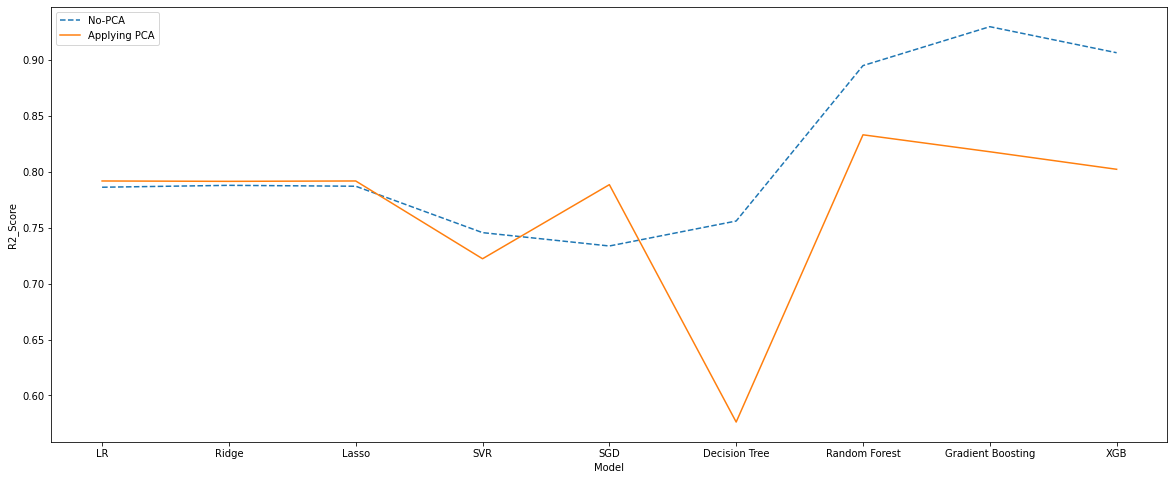

In [480]:
plt.figure(figsize=(20,8))
sns.lineplot(data=score_predicted,x='Model',y='R2_Score', linestyle='dashed',legend='auto')
sns.lineplot(data=score_predicted_pca,x='Model',y='R2_Score')
plt.legend(['No-PCA','Applying PCA']) 

In [453]:
# After PCA the performance(R2 score) has actually dropped for many models


In [498]:
# Feature Importance after PCA, XGboost

ft_imp=pd.DataFrame(zip(xgb_reg.feature_importances_*100,x_train.columns),columns=['feature_imp','columns'])
ft_imp.sort_values(by='feature_imp',ascending=False)

,feature_imp,columns
4,49.420593,NOX
0,18.798861,CRIM
5,14.030653,RM
3,7.733654,CHAS
7,2.923727,DIS
1,2.922496,ZN
6,2.631005,AGE
2,1.539014,INDUS


In [499]:
# feature_imp- Linear regression
pd.DataFrame(zip(lr.coef_.transpose(),x_train.columns)).sort_values(by=0,ascending=False)

,0,1
5,[11.456948567952324],RM
7,[5.214287656946691],DIS
3,[5.063236396233461],CHAS
0,[2.426567028729571],CRIM
6,[1.15680165367752],AGE
2,[-0.2028118783636999],INDUS
1,[-1.5119725001340192],ZN
4,[-8.930715045388245],NOX


In [478]:
# https://www.kaggle.com/code/vipulgandhi/how-to-choose-right-metric-for-evaluating-ml-model